In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns

from matplotlib import rc
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
from tools import *

%matplotlib inline
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
sns.set_style('ticks')
sns.set_context('poster')
sns.set_style('ticks')
sns.set_context('poster')

In [2]:
masks = pd.read_csv('mnist_masks.csv')
def load_data(files):
    raw_results = list()
    for filename in files:
        with open(filename, 'r') as infile:
            raw_results += json.load(infile)
    results = list_of_dicts_to_dict_of_lists(raw_results)
    del raw_results
    for key, value in results.items():
        results[key] = to_nested_tuples(value)
    rdf = pd.DataFrame(data=results)
    del results
    return rdf

# Experiment 1 Train

In [3]:
rdf = load_data(['results/2020-04-30T19:13:11.282168-04:00.json'])
rdf = rdf[rdf['success']]
print('((1, 2, 3, 4), (1, 2), (3, 4))',
      get_best(get_summary(rdf[rdf['phases'] == ((1, 2, 3, 4), (1, 2), (3, 4))]), 'p1')['sgd']['lr'])
print('((1, 2), (3, 4))',
      get_best(get_summary(rdf[rdf['phases'] == ((1, 2), (3, 4))]), 'p2')['sgd']['lr'])
print('((3, 4), (1, 2))',
      get_best(get_summary(rdf[rdf['phases'] == ((3, 4), (1, 2))]), 'p2')['sgd']['lr'])

((1, 2, 3, 4), (1, 2), (3, 4)) 0.03125
((1, 2), (3, 4)) 0.0625
((3, 4), (1, 2)) 0.0625


# Experiment 1 Test

In [4]:
rdf = load_data(['results/2020-04-30T20:54:06.529556-04:00.json'])
rdf = rdf[rdf['success']]
E12 = ((1, 2), (3, 4), (1, 2), (3, 4))
E34 = ((3, 4), (1, 2), (3, 4), (1, 2))
E1234 = ((1, 2, 3, 4), (1, 2), (3, 4))

## H1

In [5]:
accuracies = list()
for k,v in rdf[rdf['phases'] == E1234].iterrows():
    accuracies.append(v['accuracies'][v['phase_length'][0]][1])
print('Accuracy: {0:.4f}+-{1:.4f}'.format(
    np.mean(accuracies),
    np.std(accuracies) / np.sqrt(len(accuracies))))
h1_t, h1_p = st.ttest_1samp(accuracies, 0.9)
h1_p = h1_p / 2
print('H1: {} with p = {}'.format(
    'Reject' if (h1_p < 0.05) and (h1_t > 0) else 'Fail to Reject', h1_p))

Accuracy: 0.9501+-0.0025
H1: Reject with p = 8.951731886690729e-51


## H2

In [6]:
accuracies = list()
for k,v in rdf[rdf['phases'] == E1234].iterrows():
    accuracies.append(v['accuracies'][v['phase_length'][0]][2])
print('Accuracy: {0:.4f}+-{1:.4f}'.format(
    np.mean(accuracies),
    np.std(accuracies) / np.sqrt(len(accuracies))))
h2_t, h2_p = st.ttest_1samp(accuracies, 0.9)
h2_p = h2_p / 2
print('H2: {} with p = {}'.format(
    'Reject' if (h2_p < 0.05) and (h2_t > 0) else 'Fail to Reject', h2_p))

Accuracy: 0.9379+-0.0049
H2: Reject with p = 3.563482817226036e-13


## H3

In [7]:
accuracies = list()
for k,v in rdf[rdf['phases'] == E12].iterrows():
    accuracies.append(v['accuracies'][v['phase_length'][0]][0])
print('Accuracy: {0:.4f}+-{1:.4f}'.format(
    np.mean(accuracies),
    np.std(accuracies) / np.sqrt(len(accuracies))))
h3_t, h3_p = st.ttest_1samp(accuracies, 0.9)
h3_p = h3_p / 2
print('H3: {} with p = {}'.format(
    'Reject' if (h3_p < 0.05) and (h3_t > 0) else 'Fail to Reject', h3_p))

Accuracy: 0.9268+-0.0056
H3: Reject with p = 1.4753366878959e-06


## H4

In [8]:
accuracies = list()
for k,v in rdf[rdf['phases'] == E12].iterrows():
    accuracies.append(v['accuracies'][v['phase_length'][0] + v['phase_length'][1]][1])
print('Accuracy: {0:.4f}+-{1:.4f}'.format(
    np.mean(accuracies),
    np.std(accuracies) / np.sqrt(len(accuracies))))
h4_t, h4_p = st.ttest_1samp(accuracies, 0.9)
h4_p = h4_p / 2
print('H4: {} with p = {}'.format(
    'Reject' if (h4_p < 0.05) and (h4_t > 0) else 'Fail to Reject', h4_p))

Accuracy: 0.9171+-0.0071
H4: Reject with p = 0.008548466300172327


## H5

In [9]:
accuracies = list()
for k,v in rdf[rdf['phases'] == E12].iterrows():
    accuracies.append(v['accuracies'][v['phase_length'][0] + v['phase_length'][1]][0])
print('Accuracy: {0:.4f}+-{1:.4f}'.format(
    np.mean(accuracies),
    np.std(accuracies) / np.sqrt(len(accuracies))))
h5_t, h5_p = st.ttest_1samp(accuracies, 0.9)
h5_p = h5_p / 2
print('H5: {} with p = {}'.format(
    'Reject' if (h5_p < 0.05) and (h5_t < 0) else 'Fail to Reject', h5_p))

Accuracy: 0.4073+-0.0124
H5: Reject with p = 1.02777167960526e-96


## H6

In [10]:
P1_time = list()
for k,v in rdf[rdf['phases'] == E12].iterrows():
    P1_time.append(v['phase_length'][0])
P3_time = list()
for k,v in rdf[rdf['phases'] == E12].iterrows():
    P3_time.append(v['phase_length'][2])
print('P1: {0:.4f}±{1:.4f}\nP3: {2:8.4f}±{3:.4f}'.format(
    np.mean(P1_time),
    np.std(P1_time) / np.sqrt(len(P1_time)),
    np.mean(P3_time),
    np.std(P3_time) / np.sqrt(len(P3_time))))
h6_t, h6_p = st.ttest_ind(P1_time, P3_time)
h6_p = h6_p / 2
print('H6: {} with p = {}'.format(
    'Reject' if (h6_p < 0.05) and (h6_t > 0) else 'Fail to Reject', h6_p))

P1: 140.4750±3.7063
P3:  49.9500±2.1512
H6: Reject with p = 4.769597753049347e-67


## H7

In [11]:
P2_time = list()
for k,v in rdf[rdf['phases'] == E12].iterrows():
    P2_time.append(v['phase_length'][1])
P4_time = list()
for k,v in rdf[rdf['phases'] == E12].iterrows():
    P4_time.append(v['phase_length'][3])
print('P2: {0:.4f}±{1:.4f}\nP4: {2:8.4f}±{3:.4f}'.format(
    np.mean(P2_time),
    np.std(P2_time) / np.sqrt(len(P2_time)),
    np.mean(P4_time),
    np.std(P4_time) / np.sqrt(len(P4_time))))
h7_t, h7_p = st.ttest_ind(P2_time, P4_time)
h7_p = h7_p / 2
print('H8: {} with p = {}'.format(
    'Reject' if (h7_p < 0.05) and (h7_t > 0) else 'Fail to Reject', h7_p))

P2: 157.0500±3.1881
P4:  31.1500±1.3596
H8: Reject with p = 2.0929226263156543e-128


## H8

In [12]:
E1234_time = list()
for k,v in rdf[rdf['phases'] == E1234].iterrows():
    E1234_time.append(v['phase_length'][0])
E12_time = list()
for k,v in rdf[rdf['phases'] == E12].iterrows():
    E12_time.append(v['phase_length'][0] + v['phase_length'][1])
print('E1234: {0:.4f}±{1:.4f}\nE12: {2:11.4f}±{3:.4f}'.format(
    np.mean(E1234_time),
    np.std(E1234_time) / np.sqrt(len(E1234_time)),
    np.mean(E12_time),
    np.std(E12_time) / np.sqrt(len(E12_time))))
h8_t, h8_p = st.ttest_ind(E1234_time, E12_time)
print('H8: {} with p = {}'.format(
    'Reject' if h8_p < 0.05 else 'Fail to Reject', h8_p))

E1234: 1079.6750±17.2478
E12:    297.5250±5.2142
H8: Reject with p = 1.1600281884948156e-152


## H9

In [13]:
accuracies = list()
for k,v in rdf[rdf['phases'] == E34].iterrows():
    accuracies.append(v['accuracies'][v['phase_length'][0]][0])
print('Accuracy: {0:.4f}+-{1:.4f}'.format(
    np.mean(accuracies),
    np.std(accuracies) / np.sqrt(len(accuracies))))
h9_t, h9_p = st.ttest_1samp(accuracies, 0.9)
h9_p = h9_p / 2
print('H9: {} with p = {}'.format(
    'Reject' if (h9_p < 0.05) and (h9_t > 0) else 'Fail to Reject', h9_p))

Accuracy: 0.9329+-0.0050
H9: Reject with p = 1.8335542053693976e-10


## H10

In [14]:
accuracies = list()
for k,v in rdf[rdf['phases'] == E34].iterrows():
    accuracies.append(v['accuracies'][v['phase_length'][0] + v['phase_length'][1]][1])
print('Accuracy: {0:.4f}+-{1:.4f}'.format(
    np.mean(accuracies),
    np.std(accuracies) / np.sqrt(len(accuracies))))
h10_t, h10_p = st.ttest_1samp(accuracies, 0.9)
h10_p = h10_p / 2
print('H4: {} with p = {}'.format(
    'Reject' if (h10_p < 0.05) and (h10_t > 0) else 'Fail to Reject', h10_p))

Accuracy: 0.9175+-0.0053
H4: Reject with p = 0.0006058983885684054


## H11

In [15]:
E12_time = list()
for k,v in rdf[rdf['phases'] == E12].iterrows():
    E12_time.append(v['phase_length'][0])
E34_time = list()
for k,v in rdf[rdf['phases'] == E34].iterrows():
    E34_time.append(v['phase_length'][0])
print('E12: {0:.4f}±{1:.4f}\nE34: {2:8.4f}±{3:.4f}'.format(
    np.mean(E12_time),
    np.std(E12_time) / np.sqrt(len(E12_time)),
    np.mean(E34_time),
    np.std(E34_time) / np.sqrt(len(E34_time))))
h11_t, h11_p = st.ttest_ind(E12_time, E34_time)
print('H11: {} with p = {}'.format(
    'Reject' if h11_p < 0.05 else 'Fail to Reject', h11_p))

E12: 140.4750±3.7063
E34:  98.0000±3.2311
H11: Reject with p = 1.6391538991139786e-16


## H12

In [16]:
E12_time = list()
for k,v in rdf[rdf['phases'] == E12].iterrows():
    E12_time.append(v['phase_length'][1])
E34_time = list()
for k,v in rdf[rdf['phases'] == E34].iterrows():
    E34_time.append(v['phase_length'][1])
print('E12: {0:.4f}±{1:.4f}\nE34: {2:8.4f}±{3:.4f}'.format(
    np.mean(E12_time),
    np.std(E12_time) / np.sqrt(len(E12_time)),
    np.mean(E34_time),
    np.std(E34_time) / np.sqrt(len(E34_time))))
h12_t, h12_p = st.ttest_ind(E12_time, E34_time)
print('H12: {} with p = {}'.format(
    'Reject' if h12_p < 0.05 else 'Fail to Reject', h12_p))

E12: 157.0500±3.1881
E34: 195.9000±3.8956
H12: Reject with p = 1.1007130984821513e-13


## H13

In [17]:
E12_time = list()
for k,v in rdf[rdf['phases'] == E12].iterrows():
    E12_time.append(v['phase_length'][0])
E34_time = list()
for k,v in rdf[rdf['phases'] == E34].iterrows():
    E34_time.append(v['phase_length'][1])
print('E12: {0:.4f}±{1:.4f}\nE34: {2:8.4f}±{3:.4f}'.format(
    np.mean(E12_time),
    np.std(E12_time) / np.sqrt(len(E12_time)),
    np.mean(E34_time),
    np.std(E34_time) / np.sqrt(len(E34_time))))
h13_t, h13_p = st.ttest_ind(E12_time, E34_time)
print('H13: {} with p = {}'.format(
    'Reject' if h13_p < 0.05 else 'Fail to Reject', h13_p))

E12: 140.4750±3.7063
E34: 195.9000±3.8956
H13: Reject with p = 3.7884439121228604e-22


## H14

In [18]:
E12_time = list()
for k,v in rdf[rdf['phases'] == E12].iterrows():
    E12_time.append(v['phase_length'][1])
E34_time = list()
for k,v in rdf[rdf['phases'] == E34].iterrows():
    E34_time.append(v['phase_length'][0])
print('E12: {0:.4f}±{1:.4f}\nE34: {2:8.4f}±{3:.4f}'.format(
    np.mean(E12_time),
    np.std(E12_time) / np.sqrt(len(E12_time)),
    np.mean(E34_time),
    np.std(E34_time) / np.sqrt(len(E34_time))))
h14_t, h14_p = st.ttest_ind(E12_time, E34_time)
print('H14: {} with p = {}'.format(
    'Reject' if h14_p < 0.05 else 'Fail to Reject', h14_p))

E12: 157.0500±3.1881
E34:  98.0000±3.2311
H14: Reject with p = 2.3421053368482765e-32


## Family Wide Significance Test

In [19]:
p_values = [('H1', h1_p),
            ('H2', h2_p),
            ('H3', h3_p),
            ('H4', h4_p),
            ('H5', h5_p),
            ('H6', h6_p),
            ('H7', h7_p),
            ('H8', h8_p),
            ('H9', h9_p),
            ('H10', h10_p),
            ('H11', h11_p),
            ('H12', h12_p),
            ('H13', h13_p),
            ('H14', h14_p)]
sorted_p_values = sorted(p_values, key=lambda x: x[1])
try:
    for i in range(len(p_values)):
        assert(sorted_p_values[i][1] <= 0.01 / (len(p_values) - i))
    print('Reject all with family wide significance (p < 0.01)')
    print()
    text = ''
    text += '|------------|---------|\n'
    text += '| Hypothesis | P-Value |\n'
    text += '|------------|---------|\n'
    for k, v in p_values:
        if v < 0.0001:
            text += '| {0:>10} | <0.0001 |\n'.format(k)
        else:
            text += '| {0:>10} | {1:7.4f} |\n'.format(k, v)
    text += '|------------|---------|\n'
    with open('mnist_sgd_hypotheses.txt', 'w') as outfile:
        print(text, file=outfile)
    print(text)
except AssertionError:
    print('Fail to Reject all with family wide significance (p < 0.01)')

Reject all with family wide significance (p < 0.01)

|------------|---------|
| Hypothesis | P-Value |
|------------|---------|
|         H1 | <0.0001 |
|         H2 | <0.0001 |
|         H3 | <0.0001 |
|         H4 |  0.0085 |
|         H5 | <0.0001 |
|         H6 | <0.0001 |
|         H7 | <0.0001 |
|         H8 | <0.0001 |
|         H9 | <0.0001 |
|        H10 |  0.0006 |
|        H11 | <0.0001 |
|        H12 | <0.0001 |
|        H13 | <0.0001 |
|        H14 | <0.0001 |
|------------|---------|



## Plotting

In [20]:
max_phase_lengths = list()
for _, row in rdf.iterrows():
    for i, l in enumerate(row['phase_length']):
        if len(max_phase_lengths) == i:
            max_phase_lengths.append(0)
        max_phase_lengths[i] = max(max_phase_lengths[i], l)
data = dict()
for k in rdf['phases'].unique():
    data[k] = dict()
    for k2 in ['d1_count',
               'd2_count']:
        data[k][k2] = [np.zeros(i, dtype=int) for i in max_phase_lengths]
    for k2 in ['d1_avg',
               'd1_sec',
               'd1_min',
               'd1_max',
               'd2_avg',
               'd2_sec',
               'd2_min',
               'd2_max']:
        data[k][k2] = [np.zeros(i, dtype=float) for i in max_phase_lengths]
    data[k]['phase_lengths'] = [list() for i in max_phase_lengths]
    for i in range(len(max_phase_lengths)):
        data[k]['d1_min'][i] += 1
        data[k]['d2_min'][i] += 1

    kdf = rdf[rdf['phases'] == k]
    for _, row in kdf.iterrows():
        j = 0
        for i, l in enumerate(row['phase_length']):
            data[k]['phase_lengths'][i].append(l)

            if k == E1234:
                d1_index = 1
                d2_index = 2
            elif k == E12:
                d1_index = 0
                d2_index = 1
            else:
                assert k == E34
                d1_index = 1
                d2_index = 0
            
            values = np.array(row['accuracies'])[j:j + l, d1_index]
            mask = np.where(np.array(np.invert(np.isnan(values)), dtype=int))[0]
            values = values[mask]
            delta = values - data[k]['d1_avg'][i][mask]
            data[k]['d1_count'][i][mask] += 1
            data[k]['d1_avg'][i][mask] += delta / data[k]['d1_count'][i][mask]
            data[k]['d1_sec'][i][mask] += delta * (values - data[k]['d1_avg'][i][mask])
            data[k]['d1_min'][i][mask] = np.minimum(data[k]['d1_min'][i][mask], values)
            data[k]['d1_max'][i][mask] = np.maximum(data[k]['d1_max'][i][mask], values)

            values = np.array(row['accuracies'])[j:j + l, d2_index]
            mask = np.where(np.array(np.invert(np.isnan(values)), dtype=int))[0]
            values = values[mask]
            delta = values - data[k]['d2_avg'][i][mask]
            data[k]['d2_count'][i][mask] += 1
            data[k]['d2_avg'][i][mask] += delta / data[k]['d2_count'][i][mask]
            data[k]['d2_sec'][i][mask] += delta * (values - data[k]['d2_avg'][i][mask])
            data[k]['d2_min'][i][mask] = np.minimum(data[k]['d2_min'][i][mask], values)
            data[k]['d2_max'][i][mask] = np.maximum(data[k]['d2_max'][i][mask], values)

            j += l
    data[k]['d1_sem'] = list()
    data[k]['d2_sem'] = list()
    for i in range(len(max_phase_lengths)):
        data[k]['d1_sem'].append(np.nan_to_num(np.sqrt(data[k]['d1_sec'][i]) / data[k]['d1_count'][i]))
        data[k]['d2_sem'].append(np.nan_to_num(np.sqrt(data[k]['d2_sec'][i]) / data[k]['d2_count'][i]))
    del data[k]['d1_sec']
    del data[k]['d2_sec']

/Users/dylanashley/.miniconda3/envs/tensorflow-1.13.1/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in true_divide
/Users/dylanashley/.miniconda3/envs/tensorflow-1.13.1/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in true_divide


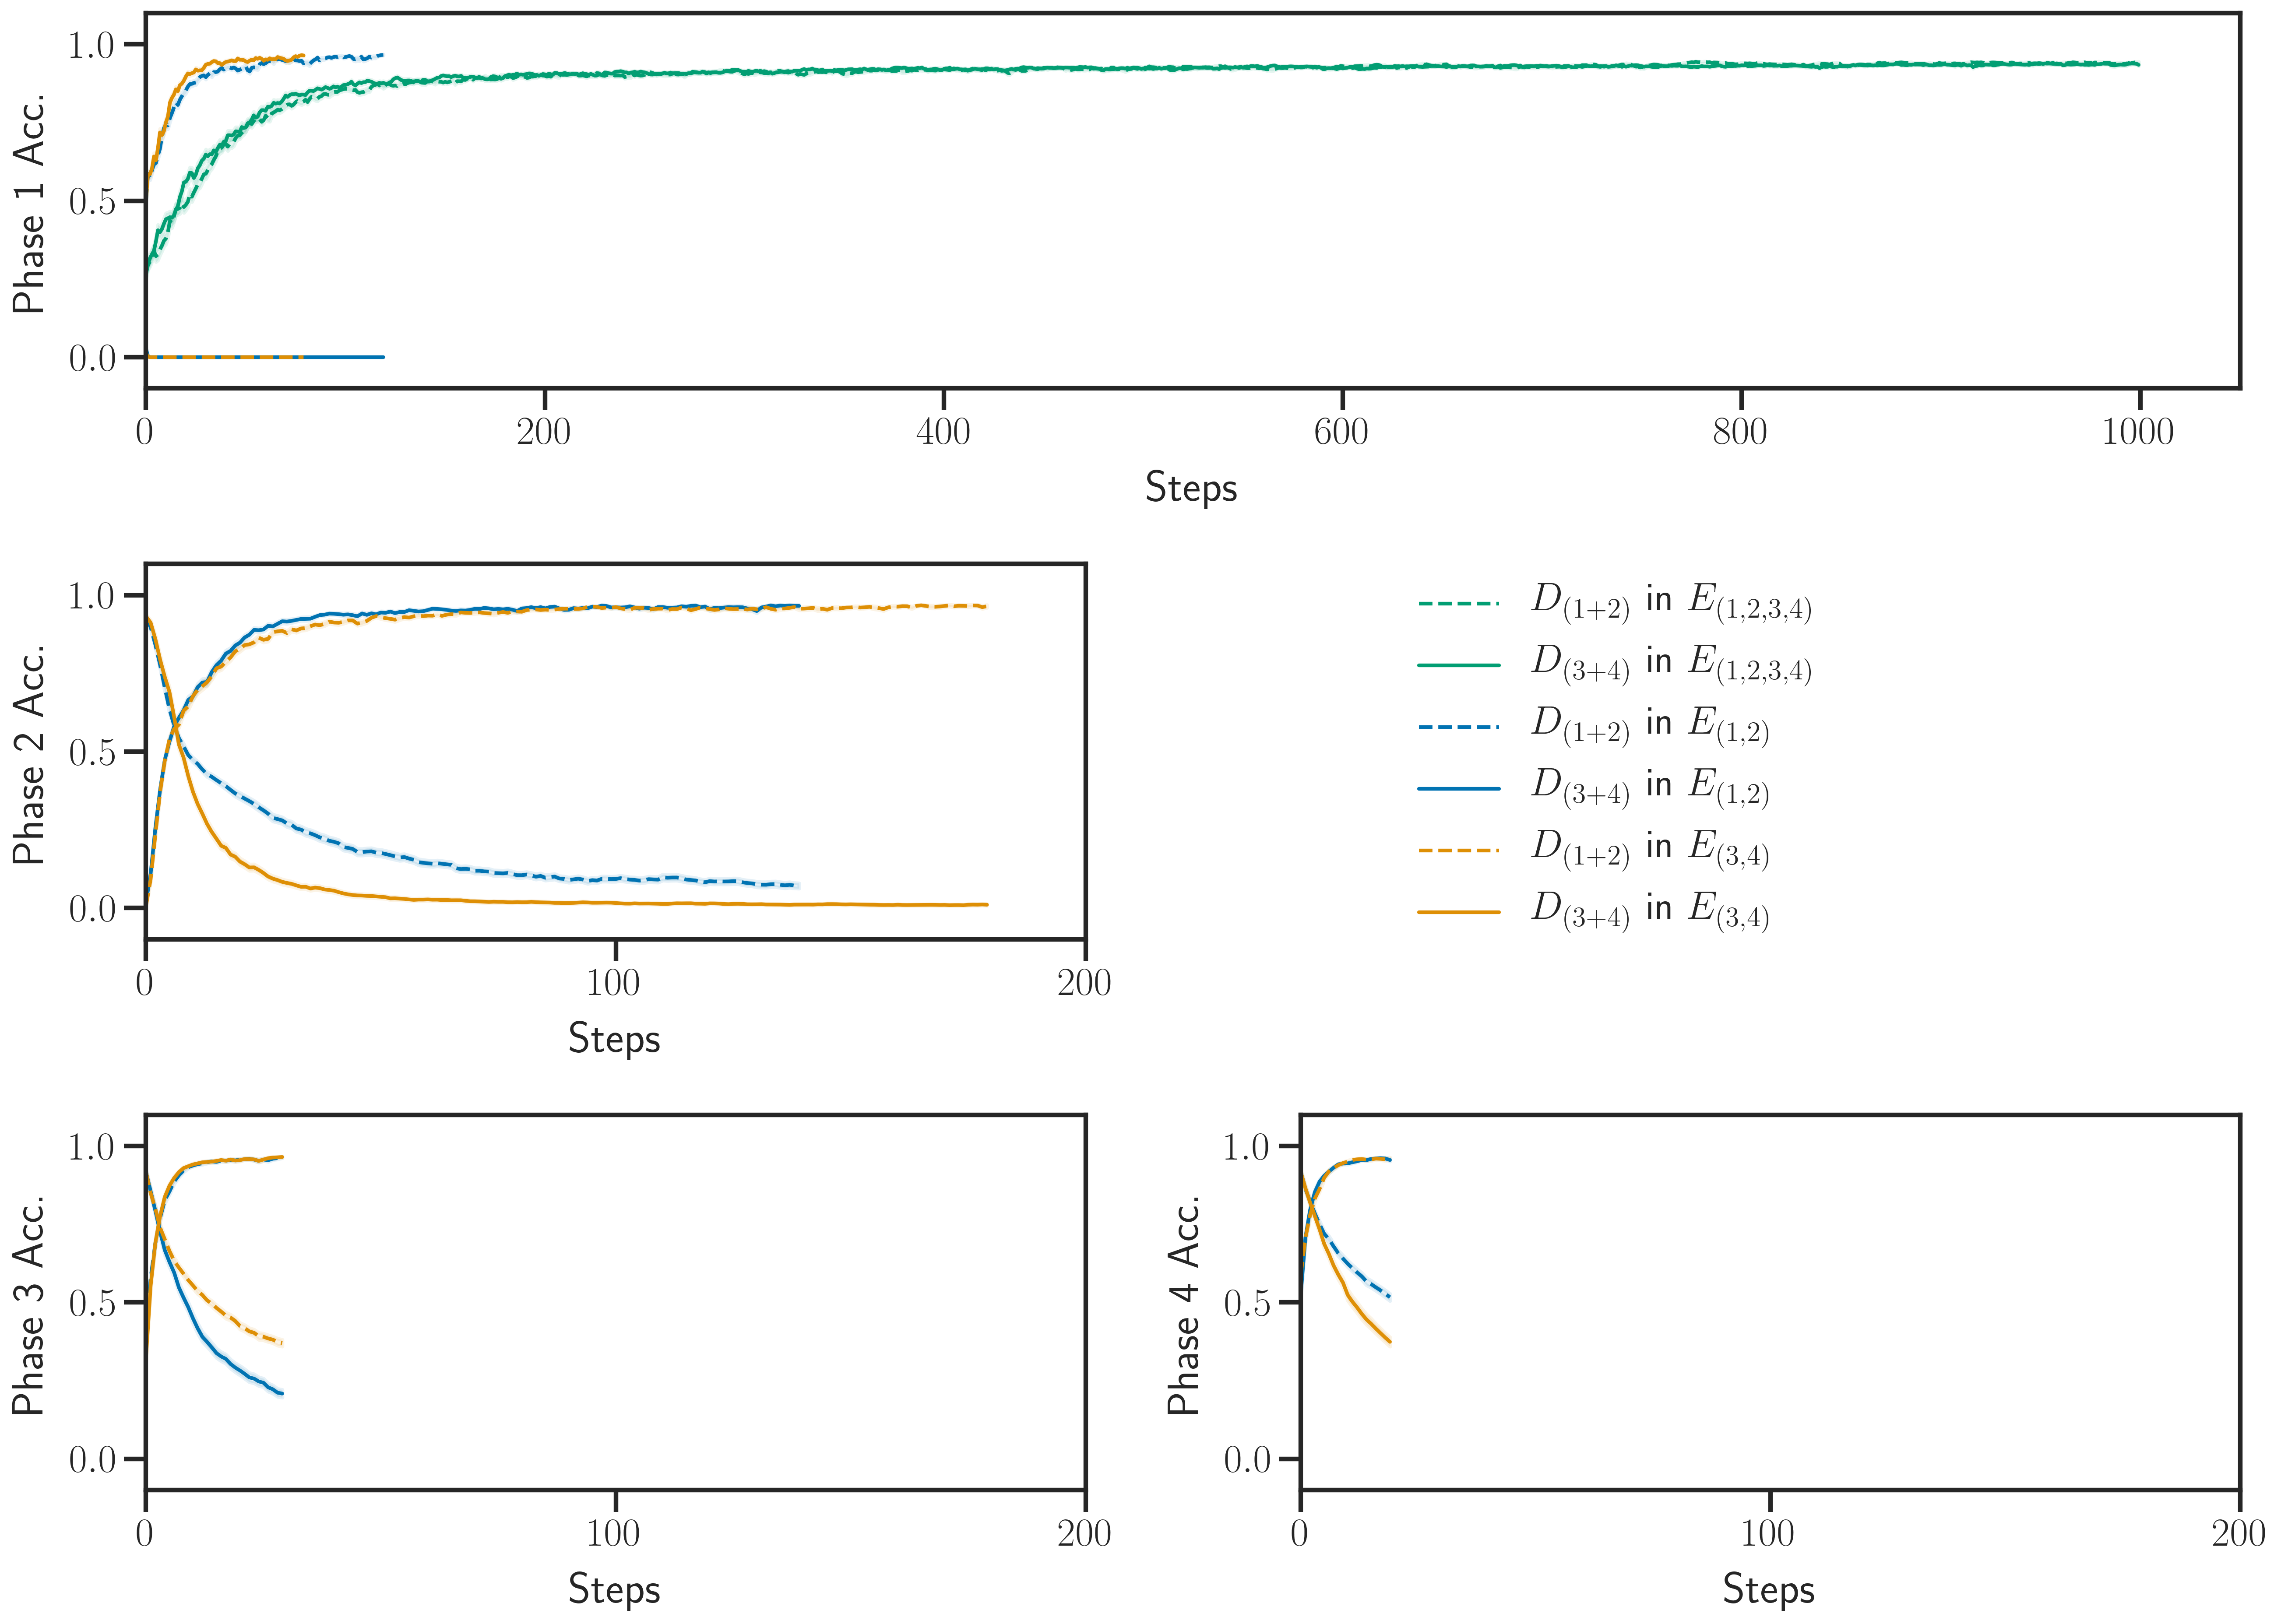

In [21]:
threshold = 125
fig = plt.figure(figsize=(18, 13), dpi=300)
gs = GridSpec(3, 2, figure=fig)
axarr = list()
axarr.append(fig.add_subplot(gs[0, :]))
axarr.append(fig.add_subplot(gs[1, 0]))
axarr.append(fig.add_subplot(gs[2, 0]))
axarr.append(fig.add_subplot(gs[2, 1]))
colors = sns.color_palette('colorblind', len(data.keys()))
xmax = 0

# phase 1 plot
ax = axarr[0]

x = np.where(data[E1234]['d1_count'][0] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E1234]['d1_avg'][0][x]
yerr = data[E1234]['d1_sem'][0][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[2], alpha=0.1)
ax.plot(x, y, color=colors[2], label=r'$D_{(1 + 2)}$ in $E_{(1, 2, 3, 4)}$', linestyle='--', linewidth=2)

x = np.where(data[E1234]['d2_count'][0] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E1234]['d2_avg'][0][x]
yerr = data[E1234]['d2_sem'][0][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[2], alpha=0.1)
ax.plot(x, y, color=colors[2], label=r'$D_{(3 + 4)}$ in $E_{(1, 2, 3, 4)}$', linestyle='-', linewidth=2)

x = np.where(data[E12]['d1_count'][0] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E12]['d1_avg'][0][x]
yerr = data[E12]['d1_sem'][0][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[0], alpha=0.1)
ax.plot(x, y, color=colors[0], label=r'$D_{(1 + 2)}$ in $E_{(1, 2)}$', linestyle='--', linewidth=2)

x = np.where(data[E12]['d2_count'][0] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E12]['d2_avg'][0][x]
yerr = data[E12]['d2_sem'][0][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[0], alpha=0.1)
ax.plot(x, y, color=colors[0], label=r'$D_{(3 + 4)}$ in $E_{(1, 2)}$', linestyle='-', linewidth=2)

x = np.where(data[E34]['d1_count'][0] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E34]['d1_avg'][0][x]
yerr = data[E34]['d1_sem'][0][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[1], alpha=0.1)
ax.plot(x, y, color=colors[1], label=r'$D_{(1 + 2)}$ in $E_{(3, 4)}$', linestyle='--', linewidth=2)

x = np.where(data[E34]['d2_count'][0] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E34]['d2_avg'][0][x]
yerr = data[E34]['d2_sem'][0][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[1], alpha=0.1)
ax.plot(x, y, color=colors[1], label=r'$D_{(3 + 4)}$ in $E_{(3, 4)}$', linestyle='-', linewidth=2)

# phase 2 plot
ax = axarr[1]

x = np.where(data[E12]['d1_count'][1] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E12]['d1_avg'][1][x]
yerr = data[E12]['d1_sem'][1][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[0], alpha=0.1)
ax.plot(x, y, color=colors[0], linestyle='--', linewidth=2)

x = np.where(data[E12]['d2_count'][1] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E12]['d2_avg'][1][x]
yerr = data[E12]['d2_sem'][1][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[0], alpha=0.1)
ax.plot(x, y, color=colors[0], linestyle='-', linewidth=2)

x = np.where(data[E34]['d1_count'][1] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E34]['d1_avg'][1][x]
yerr = data[E34]['d1_sem'][1][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[1], alpha=0.1)
ax.plot(x, y, color=colors[1], linestyle='--', linewidth=2)

x = np.where(data[E34]['d2_count'][1] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E34]['d2_avg'][1][x]
yerr = data[E34]['d2_sem'][1][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[1], alpha=0.1)
ax.plot(x, y, color=colors[1], linestyle='-', linewidth=2)

# phase 3 plot
ax = axarr[2]

x = np.where(data[E12]['d1_count'][2] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E12]['d1_avg'][2][x]
yerr = data[E12]['d1_sem'][2][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[0], alpha=0.1)
ax.plot(x, y, color=colors[0], linestyle='--', linewidth=2)

x = np.where(data[E12]['d2_count'][2] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E12]['d2_avg'][2][x]
yerr = data[E12]['d2_sem'][2][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[0], alpha=0.1)
ax.plot(x, y, color=colors[0], linestyle='-', linewidth=2)

x = np.where(data[E34]['d1_count'][2] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E34]['d1_avg'][2][x]
yerr = data[E34]['d1_sem'][2][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[1], alpha=0.1)
ax.plot(x, y, color=colors[1], linestyle='--', linewidth=2)

x = np.where(data[E34]['d2_count'][2] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E34]['d2_avg'][2][x]
yerr = data[E34]['d2_sem'][2][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[1], alpha=0.1)
ax.plot(x, y, color=colors[1], linestyle='-', linewidth=2)

# phase 4 plot
ax = axarr[3]

x = np.where(data[E12]['d1_count'][3] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E12]['d1_avg'][3][x]
yerr = data[E12]['d1_sem'][3][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[0], alpha=0.1)
ax.plot(x, y, color=colors[0], linestyle='--', linewidth=2)

x = np.where(data[E12]['d2_count'][3] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E12]['d2_avg'][3][x]
yerr = data[E12]['d2_sem'][3][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[0], alpha=0.1)
ax.plot(x, y, color=colors[0], linestyle='-', linewidth=2)

x = np.where(data[E34]['d1_count'][3] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E34]['d1_avg'][3][x]
yerr = data[E34]['d1_sem'][3][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[1], alpha=0.1)
ax.plot(x, y, color=colors[1], linestyle='--', linewidth=2)

x = np.where(data[E34]['d2_count'][3] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E34]['d2_avg'][3][x]
yerr = data[E34]['d2_sem'][3][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[1], alpha=0.1)
ax.plot(x, y, color=colors[1], linestyle='-', linewidth=2)

# clean up plot
for j in range(len(axarr)):
    ax = axarr[j]
    ax.set_ylim(-0.1, 1.1)
    ax.set_yticks([0.0, 0.5, 1.0])
    ax.set_xlabel(r'Steps', labelpad=10)
axarr[0].set_ylabel(r'Phase 1 Acc.', labelpad=10)
axarr[0].set_xticks([0, 200, 400, 600, 800, 1000])
axarr[0].set_xlim(0, max(xmax, 1050))
axarr[1].set_ylabel(r'Phase 2 Acc.', labelpad=10)
axarr[1].set_xticks([0, 100, 200])
axarr[1].set_xlim(0, 200)
axarr[2].set_ylabel(r'Phase 3 Acc.', labelpad=10)
axarr[2].set_xticks([0, 100, 200])
axarr[2].set_xlim(0, 200)
axarr[3].set_ylabel(r'Phase 4 Acc.', labelpad=10)
axarr[3].set_xticks([0, 100, 200])
axarr[3].set_xlim(0, 200)
fig.legend(frameon=False, loc=(0.615, 0.415))
fig.tight_layout(pad=3)

# save plot
fig.savefig('mnist_sgd_all_phases_comparison.pdf', bbox_inches='tight')

# Experiment 2 Train and Test

In [ ]:
rdf = load_data([
    'results/2020-03-12T14:45:05.546544-04:00.json',
    'results/2020-03-17T02:59:00.858788-04:00.json',
    'results/2020-03-17T12:13:44.218072-04:00.json'])

In [ ]:
summary = get_summary(rdf[rdf['init_seed'] < 50])
best = get_best(summary, 'time')
validation_rows = get_only_best(rdf[rdf['init_seed'] < 50], best)
validation_total_times = {optimizer: list() for optimizer in rdf['optimizer'].unique()}
for _, row in validation_rows.iterrows():
    validation_total_times[row['optimizer']].append(sum(row['phase_length']))

test_rows = rdf[rdf['init_seed'] >= 50]
test_total_times = {optimizer: list() for optimizer in rdf['optimizer'].unique()}
for _, row in test_rows.iterrows():
    test_total_times[row['optimizer']].append(sum(row['phase_length']))

text = ''
text += '|-----------|------------------|------------------|\n'
text += '| Optimizer | Validation Steps | Test Steps       |\n'
text += '|-----------|------------------|------------------|\n'
for optimizer in sorted(list(validation_total_times.keys())):
    text += '| {0:>9} | {1:>6.2f}±{2:<5.2f}     | {3:>6.2f}±{4:<5.2f}     |\n'.format(
        optimizer,
        np.mean(validation_total_times[optimizer]),
        np.std(validation_total_times[optimizer]) / np.sqrt(len(validation_total_times[optimizer])),
        np.mean(test_total_times[optimizer]),
        np.std(test_total_times[optimizer]) / np.sqrt(len(test_total_times[optimizer])))
text += '|-----------|------------------|------------------|'
with open('mnist_total_steps.txt', 'w') as outfile:
    print(text, file=outfile)
print(text)

In [ ]:
rdf = rdf[rdf['init_seed'] >= 50]

In [ ]:
max_phase_lengths = list()
for _, row in rdf.iterrows():
    for i, l in enumerate(row['phase_length']):
        if len(max_phase_lengths) == i:
            max_phase_lengths.append(0)
        max_phase_lengths[i] = max(max_phase_lengths[i], l)
data = dict()
for k,v in best.items():
    data[k] = dict()
    for k2 in ['d1_count',
               'd2_count',
               'online_count',
               'pi_count',
               'ao_count']:
        data[k][k2] = [np.zeros(i, dtype=int) for i in max_phase_lengths]
    for k2 in ['d1_avg',
               'd1_sec',
               'd1_min',
               'd1_max',
               'd2_avg',
               'd2_sec',
               'd2_min',
               'd2_max',
               'online_avg',
               'online_sec',
               'online_min',
               'online_max',
               'pi_avg',
               'pi_sec',
               'pi_min',
               'pi_max',
               'ao_avg',
               'ao_sec',
               'ao_min',
               'ao_max']:
        data[k][k2] = [np.zeros(i, dtype=float) for i in max_phase_lengths]
    data[k]['phase_lengths'] = [list() for i in max_phase_lengths]
    for i in range(len(max_phase_lengths)):
        data[k]['d1_min'][i] += 1
        data[k]['d2_min'][i] += 1
    kdf = rdf[rdf['optimizer'] == k]
    for _, row in kdf.iterrows():
        j = 0
        for i, l in enumerate(row['phase_length']):
            data[k]['phase_lengths'][i].append(l)

            values = np.array(row['accuracies'])[j:j + l, 0]
            mask = np.where(np.array(np.invert(np.isnan(values)), dtype=int))[0]
            values = values[mask]
            delta = values - data[k]['d1_avg'][i][mask]
            data[k]['d1_count'][i][mask] += 1
            data[k]['d1_avg'][i][mask] += delta / data[k]['d1_count'][i][mask]
            data[k]['d1_sec'][i][mask] += delta * (values - data[k]['d1_avg'][i][mask])
            data[k]['d1_min'][i][mask] = np.minimum(data[k]['d1_min'][i][mask], values)
            data[k]['d1_max'][i][mask] = np.maximum(data[k]['d1_max'][i][mask], values)

            values = np.array(row['accuracies'])[j:j + l, 1]
            mask = np.where(np.array(np.invert(np.isnan(values)), dtype=int))[0]
            values = values[mask]
            delta = values - data[k]['d2_avg'][i][mask]
            data[k]['d2_count'][i][mask] += 1
            data[k]['d2_avg'][i][mask] += delta / data[k]['d2_count'][i][mask]
            data[k]['d2_sec'][i][mask] += delta * (values - data[k]['d2_avg'][i][mask])
            data[k]['d2_min'][i][mask] = np.minimum(data[k]['d2_min'][i][mask], values)
            data[k]['d2_max'][i][mask] = np.maximum(data[k]['d2_max'][i][mask], values)

            values = np.cumsum(np.array(row['correct'])[j:j + l]) / (np.arange(l) + 1)
            mask = np.where(np.array(np.invert(np.isnan(values)), dtype=int))[0]
            values = values[mask]
            delta = values - data[k]['online_avg'][i][mask]
            data[k]['online_count'][i][mask] += 1
            data[k]['online_avg'][i][mask] += delta / data[k]['online_count'][i][mask]
            data[k]['online_sec'][i][mask] += delta * (values - data[k]['online_avg'][i][mask])
            data[k]['online_min'][i][mask] = np.minimum(data[k]['online_min'][i][mask], values)
            data[k]['online_max'][i][mask] = np.maximum(data[k]['online_max'][i][mask], values)

            values = np.array(row['pairwise_interference'])[j:j + l]
            mask = np.where(np.array(np.invert(np.isnan(values)), dtype=int))[0]
            values = values[mask]
            delta = values - data[k]['pi_avg'][i][mask]
            data[k]['pi_count'][i][mask] += 1
            data[k]['pi_avg'][i][mask] += delta / data[k]['pi_count'][i][mask]
            data[k]['pi_sec'][i][mask] += delta * (values - data[k]['pi_avg'][i][mask])
            data[k]['pi_min'][i][mask] = np.minimum(data[k]['pi_min'][i][mask], values)
            data[k]['pi_max'][i][mask] = np.maximum(data[k]['pi_max'][i][mask], values)

            values = np.array(row['activation_overlap'])[j:j + l]
            mask = np.where(np.array(np.invert(np.isnan(values)), dtype=int))[0]
            values = values[mask]
            delta = values - data[k]['ao_avg'][i][mask]
            data[k]['ao_count'][i][mask] += 1
            data[k]['ao_avg'][i][mask] += delta / data[k]['ao_count'][i][mask]
            data[k]['ao_sec'][i][mask] += delta * (values - data[k]['ao_avg'][i][mask])
            data[k]['ao_min'][i][mask] = np.minimum(data[k]['ao_min'][i][mask], values)
            data[k]['ao_max'][i][mask] = np.maximum(data[k]['ao_max'][i][mask], values)

            j += l
    data[k]['d1_sem'] = list()
    data[k]['d2_sem'] = list()
    data[k]['online_sem'] = list()
    data[k]['pi_sem'] = list()
    data[k]['ao_sem'] = list()
    for i in range(len(max_phase_lengths)):
        data[k]['d1_sem'].append(np.nan_to_num(np.sqrt(data[k]['d1_sec'][i]) / data[k]['d1_count'][i]))
        data[k]['d2_sem'].append(np.nan_to_num(np.sqrt(data[k]['d2_sec'][i]) / data[k]['d2_count'][i]))
        data[k]['online_sem'].append(np.nan_to_num(np.sqrt(data[k]['online_sec'][i]) / data[k]['online_count'][i]))
        data[k]['pi_sem'].append(np.nan_to_num(np.sqrt(data[k]['pi_sec'][i]) / data[k]['pi_count'][i]))
        data[k]['ao_sem'].append(np.nan_to_num(np.sqrt(data[k]['ao_sec'][i]) / data[k]['ao_count'][i]))
    del data[k]['d1_sec']
    del data[k]['d2_sec']
    del data[k]['online_sec']
    del data[k]['pi_sec']
    del data[k]['ao_sec']

In [ ]:
threshold = 125
fig, axarr = plt.subplots(4, 1, figsize=(9, 6), dpi=300, sharex=True)
colors = sns.color_palette('colorblind', len(data.keys()))
xmax = 0
for j in range(len(axarr)):
    ax = axarr[j]
    for i, (k, v) in enumerate(sorted(data.items(), key=lambda x: x[0])):
        other_phase = (j + 1) % 2 + 1
        x = np.where(v['d{}_count'.format(other_phase)][j] >= threshold)[0]
        xmax = max(xmax, max(x))
        y = v['d{}_avg'.format(other_phase)][j][x]
        yerr = v['d{}_sem'.format(other_phase)][j][x]
        ax.fill_between(x, y - yerr, y + yerr, color=colors[i], alpha=0.1)
        ax.plot(x, y, color=colors[i], linestyle='--', linewidth=2)

        x = np.where(v['online_count'][j] >= threshold)[0]
        xmax = max(xmax, max(x))
        y = v['online_avg'][j][x]
        yerr = v['online_sem'][j][x]
        ax.fill_between(x, y - yerr, y + yerr, color=colors[i], alpha=0.1)
        ax.plot(x, y, label=optimizer_nice_names[k], color=colors[i], linestyle='-', linewidth=2)
for j in range(len(axarr)):
    ax = axarr[j]
    ax.set_ylim(-0.05, 1.05)
    ax.set_yticks([0.0, 0.5, 1.0])
    ax.set_xlim((0, xmax * 1.05))
    ax.set_ylabel('Phase {} Acc.'.format(j + 1), labelpad=10)
ax.set_xlabel('Steps', labelpad=10)
plt.legend(frameon=False, loc=(1, 3.725))
plt.subplots_adjust(top=2)
fig.savefig('mnist_all_phases_comparison.png', bbox_inches='tight')

In [ ]:
phase_lengths = [{optimizer: list() for optimizer in rdf['optimizer'].unique()} for _ in range(4)]
for _, row in rdf.iterrows():
    for i in range(4):
        phase_lengths[i][row['optimizer']].append(row['phase_length'][i])
text += '|-----------|------------------|------------------|------------------|------------------|\n'
text += '| Optimizer | Steps in Phase 1 | Steps in Phase 2 | Steps in Phase 3 | Steps in Phase 4 |\n'
text += '|-----------|------------------|------------------|------------------|------------------|\n'
for optimizer in sorted(list(phase_lengths[0].keys())):
    text += '| {0:>9} | {1:>6.2f}±{2:<5.2f}     | {3:>6.2f}±{4:<5.2f}     | {5:>6.2f}±{6:<5.2f}     | {7:>6.2f}±{8:<5.2f}     |\n'.format(
        optimizer,
        np.mean(phase_lengths[0][optimizer]), np.std(phase_lengths[0][optimizer]) / np.sqrt(len(phase_lengths[0][optimizer])),
        np.mean(phase_lengths[1][optimizer]), np.std(phase_lengths[1][optimizer]) / np.sqrt(len(phase_lengths[1][optimizer])),
        np.mean(phase_lengths[2][optimizer]), np.std(phase_lengths[2][optimizer]) / np.sqrt(len(phase_lengths[2][optimizer])),
        np.mean(phase_lengths[3][optimizer]), np.std(phase_lengths[3][optimizer]) / np.sqrt(len(phase_lengths[3][optimizer])))
text += '|-----------|------------------|------------------|------------------|------------------|'
with open('mnist_phase_steps.txt', 'w') as outfile:
    print(text, file=outfile)
print(text)

In [ ]:
threshold = 125
fig, axmat = plt.subplots(4, 3, figsize=(24, 24), dpi=300, sharex=True)
colors = sns.color_palette('colorblind', len(data.keys()))
xmax = 0
for j in range(4):
    for i, (k, v) in enumerate(sorted(data.items(), key=lambda x: x[0])):
        other_phase = (j + 1) % 2 + 1
        x = np.where(v['d{}_count'.format(other_phase)][j] >= threshold)[0]
        xmax = max(xmax, max(x))
        y = v['d{}_avg'.format(other_phase)][j][x]
        yerr = v['d{}_sem'.format(other_phase)][j][x]
        axmat[j, 0].fill_between(x, y - yerr, y + yerr, color=colors[i], alpha=0.1)
        axmat[j, 0].plot(x, y, color=colors[i], linestyle='--', linewidth=2)

        x = np.where(v['online_count'][j] >= threshold)[0]
        xmax = max(xmax, max(x))
        y = v['online_avg'][j][x]
        yerr = v['online_sem'][j][x]
        axmat[j, 0].fill_between(x, y - yerr, y + yerr, color=colors[i], alpha=0.1)
        axmat[j, 0].plot(x, y, label=optimizer_nice_names[k], color=colors[i], linestyle='-', linewidth=2)

        x = np.where(v['pi_count'][j] >= threshold)[0]
        xmax = max(xmax, max(x))
        y = v['pi_avg'][j][x]
        yerr = v['pi_sem'][j][x]
        axmat[j, 1].fill_between(x, y - yerr, y + yerr, color=colors[i], alpha=0.1)
        axmat[j, 1].plot(x, y, label=optimizer_nice_names[k], color=colors[i], linestyle='-', linewidth=2)

        x = np.where(v['ao_count'][j] >= threshold)[0]
        xmax = max(xmax, max(x))
        y = v['ao_avg'][j][x]
        yerr = v['ao_sem'][j][x]
        axmat[j, 2].fill_between(x, y - yerr, y + yerr, color=colors[i], alpha=0.1)
        axmat[j, 2].plot(x, y, label=optimizer_nice_names[k], color=colors[i], linestyle='-', linewidth=2)
for i in range(4):
    for j in range(3):
        axmat[i, j].set_xlim((0, xmax + 10))
    axmat[i, 0].set_ylim(-0.05, 1.05)
    axmat[i, 0].set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
    axmat[i, 1].set_ylim(-0.4, 0.0)
    axmat[i, 1].set_yticks([-0.4, -0.3, -0.2, -0.1, 0.0])
    axmat[i, 2].set_ylim(0.5, 1.0)
    axmat[i, 2].set_yticks([0.5, 0.625, 0.75, 0.875, 1.0])
for i in range(4):
    axmat[i, 0].set_ylabel('Phase {}'.format(i + 1), labelpad=10)
for i in range(3):
    axmat[3, i].set_xlabel('Steps', labelpad=10)
axmat[0, 0].set_title('Accuracy', pad=10)
axmat[0, 1].set_title('Pairwise Interaction', pad=10)
axmat[0, 2].set_title('Activation Overlap', pad=10)
plt.legend(frameon=False, loc=(1, 3.775))
fig.savefig('mnist_all_interference_metrics.png', bbox_inches='tight')

In [ ]:
phase_lengths = [{optimizer: list() for optimizer in rdf['optimizer'].unique()} for _ in range(4)]
for _, row in rdf.iterrows():
    for i in range(4):
        phase_lengths[i][row['optimizer']].append(row['phase_length'][i])
boxplot_data = {'optimizer': [], 'third_phase_lengths': []}
for optimizer in sorted(list(phase_lengths[2].keys())):
    for phase_length in phase_lengths[2][optimizer]:
        boxplot_data['optimizer'].append(optimizer_nice_names[optimizer])
        boxplot_data['third_phase_lengths'].append(phase_length)
fig, ax = plt.subplots(1, 1, figsize=(9, 9), dpi=150)
ax.set_ylabel('Steps in Phase 3', labelpad=10)
sns.violinplot(x=boxplot_data['optimizer'], y=boxplot_data['third_phase_lengths'], cut=0, ax=ax)
sns.despine(offset=10, trim=True)
fig.savefig('mnist_phase_3_lengths.png', bbox_inches='tight')

In [ ]:
plt.close()
phase_lengths = {optimizer: [list() for _ in max_phase_lengths] for optimizer in rdf['optimizer'].unique()}
for _, row in rdf.iterrows():
    optimizer = row['optimizer']
    for i, phase_length in enumerate(row['phase_length']):
        phase_lengths[optimizer][i].append(phase_length)
sns.set_style('ticks')
sns.set_context('poster')
colors = sns.color_palette('colorblind', len(phase_lengths.keys()))
fig, axmat = plt.subplots(len(phase_lengths.keys()),
                          len(max_phase_lengths),
                          figsize=(5 * len(max_phase_lengths), 5 * len(phase_lengths.keys())),
                          sharex=True,
                          sharey=True)
for j, optimizer in enumerate(sorted(list(phase_lengths.keys()))):
    for i in range(len(max_phase_lengths)):
        axmat[i, j].set_xlim(0, max(max_phase_lengths) + 1)
        axmat[i, j].set_ylim(0, 80)
        axmat[i, j].hist(phase_lengths[optimizer][i], bins=range(0, max(max_phase_lengths), 10), color=colors[j])
        if i == 0:
            axmat[i, j].set_title(optimizer_nice_names[optimizer], pad=10)
        if i == len(phase_lengths.keys()) - 1:
            axmat[i, j].set_xlabel('Phase Length', labelpad=17)
            axmat[i, j].set_xticks([0, 100, 200, 300])
        if j == 0:
            axmat[i, j].set_ylabel('Phase {}'.format(i + 1), labelpad=12)
            axmat[i, j].set_yticks([0, 20, 40, 60, 80])
plt.tight_layout()
fig.savefig('mnist_all_phase_lengths.png', bbox_inches='tight')